In [1]:
import kaleido
import pandas as pd
import numpy as np
import plotly.graph_objects as go
######## Search space #########
import sys
sys.path.append("../")
from search_space.RegNet import RegNet
from search_space.utils import create_widths_plot, scatter_results
# Initialize an empty list to store dictionaries
def results_to_df(path, name):
    data = []
    # Open the text file
    with open(path, 'r') as file:
        lines = file.readlines()
        # Initialize an empty dictionary to store data for each block
        block_data = {}
        for line in lines:
            # If the line contains dashes, it indicates the end of a block
            if '-------------------------' in line:
                # If block_data is not empty, add it to the list of data dictionaries
                if block_data:
                    data.append(block_data)
                    # Reset block_data for the next block
                    block_data = {}
            elif 'best_acc' in line:
                continue
            else:
                # Split the line by ':'
                #print(line)
                key, value = line.strip().split(': ')
                # Store the key-value pair in the block_data dictionary
                block_data[key] = value

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)

    # Convert columns to appropriate data types if needed
    df['epoch'] = df['epoch'].astype(int)
    df['lr'] = df['lr'].astype(float)
    df['train_acc'] = df['train_acc'].astype(float)
    df['train_loss'] = df['train_loss'].astype(float)
    df['test_acc'] = df['test_acc'].astype(float)
    df['test_acc_top5'] = df['test_acc_top5'].astype(float)
    df['test_loss'] = df['test_loss'].astype(float)
    df['epoch_time'] = df['epoch_time'].astype(float)
    df=df.assign(name=name)
    
    return df

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import json
import os

def get_predictor_data(studies):
    train_data=[]
    for study_folder in studies: 
        data=[]
        #study_folder=f"/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/classifier_train/{study_name}"
        subjects= os.listdir(study_folder)

        subjects=[subject for subject in subjects if os.path.isdir(f"{study_folder}/{subject}")]
        print(subjects)
        for name in subjects:
            try:
                test_acc=results_to_df(f"{study_folder}/{name}/worklog.txt", f"{name}")[["epoch","test_acc","name"]]
                #test_acc=test_acc.rename(columns={"test_acc":"acc","test_loss":"test_acc"})
                #test_acc=test_acc.rename(columns={"test_loss":"test_acc"})
                #print(test_acc.columns)
                #if len(test_acc)>49:
                test_acc_piv = test_acc[["epoch","test_acc","name"]].pivot(index='name', columns='epoch', values='test_acc').add_prefix("epoch_").reset_index()
                #test_acc_piv["best_acc"]=test_acc["acc"].max()
                data.append(test_acc_piv)
            except:
                pass
        data=pd.concat(data)
        train_data.append(data)
    train_data=pd.concat(train_data)
    return train_data

In [3]:
corr_scores={}
accuracies={}
test_accuracies={}
epochs_results={}

In [4]:
import pandas as pd
from itertools import combinations
dataset="Mateo"
if dataset=="Gutenberg":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/16_08_2024_00_41/Gutenberg"]).sort_values("name").set_index("name")
elif dataset=="Mateo":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/16_08_2024_11_44/Mateo"]).sort_values("name").set_index("name")
elif dataset=="Chester":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/16_08_2024_13_43/Chester"]).sort_values("name").set_index("name")
elif dataset=="Adaline":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/17_08_2024_16_47/Adaline"]).sort_values("name").set_index("name")
elif dataset=="LaMelo":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/17_08_2024_16_21/LaMelo"]).sort_values("name").set_index("name")
elif dataset=="Caitie":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/18_08_2024_10_32/Caitie"]).sort_values("name").set_index("name")
elif dataset=="Sadie":
    train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/18_08_2024_17_04/Sadie"]).sort_values("name").set_index("name")



['adaptable_mouflon', 'amiable_kangaroo', 'amiable_owl', 'amphibian_narwhal', 'ancient_swine', 'antique_wolf', 'aquatic_dragon', 'arcane_turaco', 'asparagus_chinchilla', 'aspiring_uakari', 'astute_ibex', 'awesome_dodo', 'belligerent_deer', 'beryl_polecat', 'bipedal_ibis', 'blond_elephant', 'blue_stingray', 'brainy_turtle', 'brass_mackerel', 'burrowing_rattlesnake', 'calculating_sawfish', 'carmine_jackdaw', 'cerulean_nautilus', 'cheerful_falcon', 'clever_ibis', 'clever_pheasant', 'crouching_python', 'dancing_trout', 'dandelion_peccary', 'demonic_bonobo', 'elegant_pigeon', 'elite_ringtail', 'enigmatic_agouti', 'enormous_ocelot', 'enthusiastic_guppy', 'enthusiastic_narwhal', 'evasive_coati', 'exuberant_platypus', 'fancy_giraffe', 'feathered_jerboa', 'fervent_ostrich', 'fluorescent_python', 'fractal_goose', 'fragrant_bug', 'gainful_snake', 'giga_terrier', 'gigantic_myna', 'granite_earwig', 'gray_dog', 'great_cormorant', 'great_whippet', 'gregarious_oarfish', 'grumpy_pronghorn', 'handsome_t

In [60]:
#train_data=train_data.head(len(train_data_dist))

In [61]:
#KD
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/16_08_2024_00_44/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/16_08_2024_20_27/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/17_08_2024_14_47/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_01_01/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_19_07/LaMelo"]).sort_values("name").set_index("name")
train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_19_21/Caitie"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/19_08_2024_07_46/Sadie"]).sort_values("name").set_index("name")

#DKD
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd/21_08_2024_08_48/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd/21_08_2024_15_30/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd/21_08_2024_16_06/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd/21_08_2024_20_38/Adaline"]).sort_values("name").set_index("name")

#DKD8
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd8/22_08_2024_08_57/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd8/22_08_2024_09_17/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd8/22_08_2024_09_19/Adaline"]).sort_values("name").set_index("name")

#DKD2 smoothing
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_12_34/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_12_39/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_12_41/Adaline"]).sort_values("name").set_index("name")

#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_21_51/Sadie"]).sort_values("name").set_index("name")
#train_data_dist_2=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_21_55/Sadie"]).sort_values("name").set_index("name")
#train_data_dist_3=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_21_58/Sadie"]).sort_values("name").set_index("name")
#train_data_dist=(train_data_dist_2+train_data_dist+train_data_dist_3)/3

#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_22_11/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist_2=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_22_14/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist_3=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/22_08_2024_22_20/LaMelo"]).sort_values("name").set_index("name")
#train_data_dist=(train_data_dist_2+train_data_dist+train_data_dist_3)/3

train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/23_08_2024_11_00/Mateo"]).sort_values("name").set_index("name")
train_data_dist_2=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/23_08_2024_11_09/Mateo"]).sort_values("name").set_index("name")
train_data_dist_3=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing/23_08_2024_11_27/Mateo"]).sort_values("name").set_index("name")
train_data_dist=(train_data_dist_2+train_data_dist+train_data_dist_3)/3



#DKD2 smoothing best teacher
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/22_08_2024_15_23/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist_2=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/dkd2_hsmoothing_best_teacher/22_08_2024_15_24/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=(train_data_dist_2+train_data_dist)/2


#kd 5 epochs
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd_5epochs/22_08_2024_00_15/Gutenberg"]).sort_values("name").set_index("name")

#KD_10_annealing
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd_annealing/21_08_2024_17_29/Gutenberg"]).sort_values("name").set_index("name")

#KD_smoothing
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd_smoothing/21_08_2024_20_13/Gutenberg"]).sort_values("name").set_index("name")

#KD18
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd18/22_08_2024_08_56/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd18/22_08_2024_09_17/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd18/22_08_2024_09_19/Adaline"]).sort_values("name").set_index("name")

#KD18 best teacher
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd18_best_teacher/22_08_2024_09_43/Adaline"]).sort_values("name").set_index("name")

#KD no augmentation high smoothing
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_13_00/Adaline"]).sort_values("name").set_index("name")

#KD9 high smoothing
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_12_36/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_12_39/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_12_41/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/22_08_2024_13_02/Adaline"]).sort_values("name").set_index("name")

#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/23_08_2024_10_26/Caitie"]).sort_values("name").set_index("name")


#/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/23_08_2024_10_33/Mateo
#/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing/23_08_2024_10_36/Mateo


#KD9 high smoothing best teacher
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/22_08_2024_15_21/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist_2=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd9_hsmoothing_best_teacher/22_08_2024_15_25/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=(train_data_dist_2+train_data_dist)/2


#train_data_dist=train_data_dist.iloc[:,:11]

#train_data_dist=train_data_dist.head(len(train_data_dist)-1)
train_data=train_data.head(len(train_data_dist))
train_data_dist=train_data_dist.head(len(train_data))

['abiding_turaco', 'able_fennec', 'able_griffin', 'aboriginal_okapi', 'abstract_spoonbill', 'acrid_echidna', 'adaptable_weasel', 'adept_orangutan', 'adept_sponge', 'adept_weasel', 'amber_jackdaw', 'antique_taipan', 'apricot_jerboa', 'asparagus_mammoth', 'astute_ape', 'axiomatic_vole', 'axiomatic_wallaby', 'azure_asp', 'beige_panther', 'benign_jackrabbit', 'bizarre_grouse', 'bold_mouse', 'busy_lemur', 'calculating_coyote', 'capable_carp', 'capable_mussel', 'carrot_chameleon', 'certain_mastodon', 'certain_porpoise', 'cerulean_galago', 'charming_dachshund', 'cherry_mastiff', 'cherry_rook', 'cocky_gerbil', 'competent_bee', 'cooperative_tench', 'daffodil_mackerel', 'daffy_mongrel', 'dancing_angelfish', 'dashing_sidewinder', 'dazzling_polecat', 'deft_alpaca', 'delicate_lemur', 'delicate_swift', 'devious_cicada', 'diamond_tench', 'didactic_turkey', 'divergent_mole', 'dramatic_impala', 'elegant_aardwark', 'emerald_earthworm', 'esoteric_husky', 'expert_tody', 'fanatic_chicken', 'fancy_kestrel',

In [62]:
train_data_dist

epoch,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,epoch_10
name,,,,,,,,,,,
adaptable_mouflon,10.113333,23.353333,28.266667,31.536667,34.053333,38.363333,52.416667,58.216667,73.446667,81.876667,84.156667
amiable_kangaroo,10.020000,26.146667,31.513333,34.500000,40.093333,49.266667,58.126667,73.710000,69.783333,80.386667,84.170000
amiable_owl,9.850000,26.810000,30.563333,40.726667,56.290000,65.306667,80.163333,86.320000,85.826667,89.303333,87.703333
amphibian_narwhal,10.000000,22.986667,29.020000,32.600000,33.296667,37.636667,41.213333,54.606667,63.213333,74.530000,76.496667
ancient_swine,10.020000,25.016667,31.533333,33.623333,35.173333,39.103333,52.000000,64.243333,72.496667,78.890000,81.033333
antique_wolf,9.783333,25.323333,28.843333,33.010000,35.726667,47.176667,59.246667,67.890000,76.316667,78.526667,82.946667
aquatic_dragon,9.973333,26.680000,32.303333,34.516667,39.723333,55.023333,70.040000,71.750000,82.490000,83.170000,86.570000
arcane_turaco,10.000000,20.516667,27.820000,31.546667,34.640000,38.480000,41.646667,58.133333,69.723333,72.910000,74.940000
asparagus_chinchilla,10.190000,22.140000,27.256667,31.560000,33.973333,38.163333,47.496667,59.403333,62.583333,74.923333,79.700000


In [63]:
train_data

epoch,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,...,epoch_41,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50
name,,,,,,,,,,,,,,,,,,,,,
adaptable_mouflon,10.00,27.01,34.86,36.90,42.23,67.71,82.71,82.14,85.55,84.42,...,96.96,97.03,96.96,97.05,97.04,97.13,97.04,97.07,97.09,97.09
amiable_kangaroo,10.00,27.22,32.37,37.18,55.55,71.93,76.80,76.73,86.66,86.08,...,96.79,96.88,96.93,96.92,96.93,97.06,97.01,97.02,97.11,97.07
amiable_owl,9.52,32.11,34.64,37.19,57.13,73.25,77.68,84.89,87.62,88.80,...,96.55,96.96,96.80,96.73,96.88,96.92,96.77,96.89,96.98,96.89
amphibian_narwhal,10.01,25.34,32.04,32.69,42.44,54.23,59.82,74.68,78.21,80.41,...,95.86,96.06,96.23,96.18,96.20,96.20,96.30,96.34,96.26,96.26
ancient_swine,10.78,29.95,34.20,29.36,37.51,52.59,60.50,74.97,79.14,85.43,...,97.13,97.24,97.23,97.30,97.31,97.34,97.30,97.37,97.37,97.32
antique_wolf,10.00,27.72,33.34,33.42,45.82,61.76,75.70,80.36,81.26,82.18,...,96.53,96.66,96.83,96.73,96.82,96.89,96.86,96.90,96.96,96.93
aquatic_dragon,10.83,27.40,34.24,31.93,45.71,65.32,70.35,83.61,85.36,86.04,...,96.91,96.89,96.82,96.94,96.94,96.94,96.97,96.94,96.97,96.99
arcane_turaco,10.00,24.70,31.75,34.09,35.85,39.80,60.51,67.90,73.73,79.68,...,95.18,95.39,95.36,95.52,95.67,95.66,95.49,95.62,95.64,95.51
asparagus_chinchilla,10.00,26.51,30.98,34.22,41.94,51.07,71.12,71.12,77.53,80.09,...,95.22,95.06,95.24,95.13,95.17,95.37,95.34,95.33,95.29,95.33


In [64]:
#train_data
#train_data_cum= train_data.iloc[:,:-1].cummin(axis=1)
#train_data_cum["best_acc"]=train_data["best_acc"]

In [65]:
train_data_cum= train_data.cummax(axis=1)
train_data_cum["best_acc"]=train_data_cum.max(axis=1)
train_data["best_acc"]=train_data.max(axis=1)

train_data_dist_cum= train_data_dist.cummax(axis=1)
train_data_dist_cum["best_acc"]=train_data_dist_cum.max(axis=1)
train_data_dist["best_acc"]=train_data_dist.max(axis=1)

In [66]:
#train_data_cum= train_data.cummin(axis=1)
#train_data_cum["best_acc"]=train_data_cum.min(axis=1)
#train_data["best_acc"]=train_data.min(axis=1)

#train_data_dist_cum= train_data_dist.cummin(axis=1)
#train_data_dist_cum["best_acc"]=train_data_dist_cum.min(axis=1)
#train_data_dist["best_acc"]=train_data_dist.min(axis=1)

In [67]:
train_data.sort_values("best_acc",ascending=False)

epoch,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,...,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50,best_acc
name,,,,,,,,,,,,,,,,,,,,,
awesome_dodo,10.00,29.72,31.09,34.99,47.73,61.62,71.55,82.48,77.32,85.58,...,97.21,97.12,97.35,97.38,97.38,97.32,97.38,97.39,97.44,97.44
ancient_swine,10.78,29.95,34.20,29.36,37.51,52.59,60.50,74.97,79.14,85.43,...,97.24,97.23,97.30,97.31,97.34,97.30,97.37,97.37,97.32,97.37
brainy_turtle,10.01,30.83,34.25,38.84,63.27,68.31,85.47,86.46,88.04,86.20,...,97.14,97.35,97.17,97.10,97.25,97.13,97.24,97.22,97.12,97.35
belligerent_deer,8.30,31.58,29.02,36.12,46.28,72.10,77.47,78.14,87.86,88.06,...,96.86,96.91,97.01,97.04,97.04,97.05,97.13,97.14,97.12,97.14
adaptable_mouflon,10.00,27.01,34.86,36.90,42.23,67.71,82.71,82.14,85.55,84.42,...,97.03,96.96,97.05,97.04,97.13,97.04,97.07,97.09,97.09,97.13
amiable_kangaroo,10.00,27.22,32.37,37.18,55.55,71.93,76.80,76.73,86.66,86.08,...,96.88,96.93,96.92,96.93,97.06,97.01,97.02,97.11,97.07,97.11
aquatic_dragon,10.83,27.40,34.24,31.93,45.71,65.32,70.35,83.61,85.36,86.04,...,96.89,96.82,96.94,96.94,96.94,96.97,96.94,96.97,96.99,96.99
amiable_owl,9.52,32.11,34.64,37.19,57.13,73.25,77.68,84.89,87.62,88.80,...,96.96,96.80,96.73,96.88,96.92,96.77,96.89,96.98,96.89,96.98
antique_wolf,10.00,27.72,33.34,33.42,45.82,61.76,75.70,80.36,81.26,82.18,...,96.66,96.83,96.73,96.82,96.89,96.86,96.90,96.96,96.93,96.96


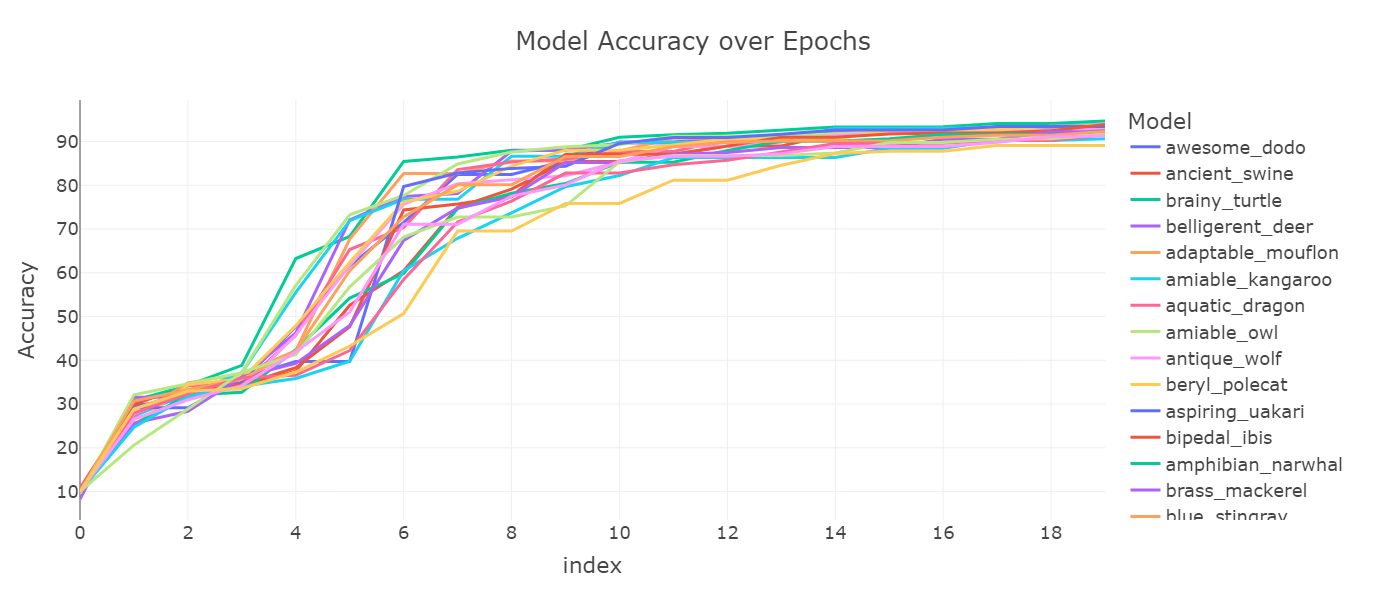

In [68]:
epochs_data=train_data_cum.sort_values("best_acc",ascending= False).iloc[:,:20].T.reset_index(drop=True).reset_index().melt(id_vars='index', var_name='Model', value_name='Accuracy')

import plotly.express as px
fig = px.line(epochs_data, x='index', y='Accuracy', color='Model', title='Model Accuracy over Epochs')
fig.update_layout(height=600, width=800, template="presentation")
fig

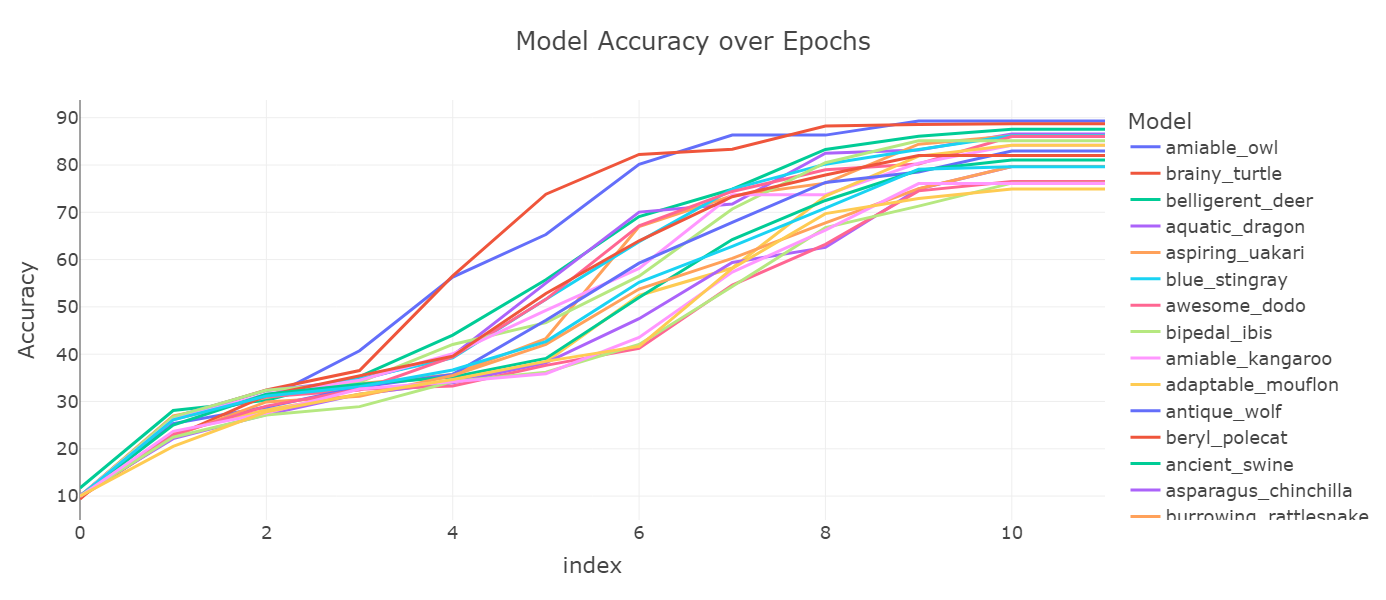

In [69]:
epochs_data=train_data_dist_cum.sort_values("best_acc",ascending= False).iloc[:,:50].T.reset_index(drop=True).reset_index().melt(id_vars='index', var_name='Model', value_name='Accuracy')

import plotly.express as px
fig = px.line(epochs_data, x='index', y='Accuracy', color='Model', title='Model Accuracy over Epochs')
fig.update_layout(height=600, width=800, template="presentation")
fig

In [70]:
train_data_cum=train_data_cum.reset_index()
train_data=train_data.reset_index()

train_data_dist_cum=train_data_dist_cum.reset_index()
train_data_dist=train_data_dist.reset_index()


In [71]:
n_epochs=10

In [72]:
correlation_matrix_base = train_data_cum.set_index("name").corr()
# Select the correlations with the last column
correlation_with_last_base = correlation_matrix_base.iloc[:-1, -1]

df_comp=pd.merge(train_data_dist_cum.iloc[:,:-1], train_data_cum[["name","best_acc"]], on="name")
correlation_matrix = df_comp.set_index("name").corr()
# Select the correlations with the last column
correlation_with_last = correlation_matrix.iloc[:-1, -1]

corr_df=pd.concat([pd.DataFrame(correlation_with_last_base).rename(columns={"best_acc":"base"}), pd.DataFrame(correlation_with_last).rename(columns={"best_acc":"dist"})], axis=1)


In [73]:
train_data_dist_cum

epoch,name,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,epoch_10,best_acc
0,adaptable_mouflon,10.113333,23.353333,28.266667,31.536667,34.053333,38.363333,52.416667,58.216667,73.446667,81.876667,84.156667,84.156667
1,amiable_kangaroo,10.020000,26.146667,31.513333,34.500000,40.093333,49.266667,58.126667,73.710000,73.710000,80.386667,84.170000,84.170000
2,amiable_owl,9.850000,26.810000,30.563333,40.726667,56.290000,65.306667,80.163333,86.320000,86.320000,89.303333,89.303333,89.303333
3,amphibian_narwhal,10.000000,22.986667,29.020000,32.600000,33.296667,37.636667,41.213333,54.606667,63.213333,74.530000,76.496667,76.496667
4,ancient_swine,10.020000,25.016667,31.533333,33.623333,35.173333,39.103333,52.000000,64.243333,72.496667,78.890000,81.033333,81.033333
5,antique_wolf,9.783333,25.323333,28.843333,33.010000,35.726667,47.176667,59.246667,67.890000,76.316667,78.526667,82.946667,82.946667
6,aquatic_dragon,9.973333,26.680000,32.303333,34.516667,39.723333,55.023333,70.040000,71.750000,82.490000,83.170000,86.570000,86.570000
7,arcane_turaco,10.000000,20.516667,27.820000,31.546667,34.640000,38.480000,41.646667,58.133333,69.723333,72.910000,74.940000,74.940000
8,asparagus_chinchilla,10.190000,22.140000,27.256667,31.560000,33.973333,38.163333,47.496667,59.403333,62.583333,74.923333,79.700000,79.700000
9,aspiring_uakari,9.993333,26.960000,30.843333,33.733333,35.720000,43.303333,67.003333,73.500000,76.170000,84.410000,86.206667,86.206667


In [74]:
total_data=[]


pairs = list(combinations(train_data_cum.index, 2))
combined_data = []

for idx1, idx2 in pairs:
    row1 = train_data_cum.loc[idx1]
    row2 = train_data_cum.loc[idx2]
    

    combined_row = {
        'name_A': row1['name'],
        'name_B': row2['name'],
        'best_acc_A': row1['best_acc'],
        'best_acc_B': row2['best_acc'],
        'label': 1 if row1['best_acc'] > row2['best_acc'] else 0
        
    }
    # Create the epochs_row dictionary
    epochs_rows = {
        f'epoch_{epoch}_A': row1[f'epoch_{epoch}'] for epoch in range(0, 51)
    }
    epochs_rows.update({
        f'epoch_{epoch}_B': row2[f'epoch_{epoch}'] for epoch in range(0, 51)
    })
    ##############################################################
    row1_dist=train_data_dist_cum.loc[idx1]
    row2_dist=train_data_dist_cum.loc[idx2]
    dist_rows= {
        f'dist_{epoch}_A': row1_dist[f'epoch_{epoch}'] for epoch in range(0, n_epochs+1)
    }
    dist_rows.update({
        f'dist_{epoch}_B': row2_dist[f'epoch_{epoch}'] for epoch in range(0, n_epochs+1)
    })
    combined_row.update(dist_rows)
    #######################
    
    # Update combined_row with epochs_rows
    combined_row.update(epochs_rows)

    combined_data.append(combined_row)

combined_df = pd.DataFrame(combined_data)



In [75]:
X_test_new=combined_df.drop(columns=['label'])
y_test_new=combined_df["label"]

In [76]:
epoch=5
X_test_new[["name_A","name_B","best_acc_A","best_acc_B",f"dist_{epoch}_A",f"dist_{epoch}_B",f"epoch_{epoch}_A",f"epoch_{epoch}_B"]]

,name_A,name_B,best_acc_A,best_acc_B,dist_5_A,dist_5_B,epoch_5_A,epoch_5_B
0,adaptable_mouflon,amiable_kangaroo,97.13,97.11,38.363333,49.266667,67.71,71.93
1,adaptable_mouflon,amiable_owl,97.13,96.98,38.363333,65.306667,67.71,73.25
2,adaptable_mouflon,amphibian_narwhal,97.13,96.34,38.363333,37.636667,67.71,54.23
3,adaptable_mouflon,ancient_swine,97.13,97.37,38.363333,39.103333,67.71,52.59
4,adaptable_mouflon,antique_wolf,97.13,96.96,38.363333,47.176667,67.71,61.76
...,...,...,...,...,...,...,...,...
185,blue_stingray,brass_mackerel,95.87,96.22,51.620000,36.183333,60.49,47.94
186,blue_stingray,burrowing_rattlesnake,95.87,95.37,51.620000,42.076667,60.49,56.79
187,brainy_turtle,brass_mackerel,97.35,96.22,73.820000,36.183333,68.31,47.94
188,brainy_turtle,burrowing_rattlesnake,97.35,95.37,73.820000,42.076667,68.31,56.79


In [77]:
epoch=10

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_0=np.repeat(0,len(y_test_new))
y_0= (X_test_new[f'epoch_{epoch}_A'] > X_test_new[f'epoch_{epoch}_B']).astype(int).values
# Calculate accuracy
y_0_accuracy = accuracy_score(y_test_new, y_0)
print(f"Accuracy: {y_0_accuracy}")

Accuracy: 0.7894736842105263


In [78]:
y_0=np.repeat(0,len(y_test_new))
y_0= (X_test_new[f'dist_{epoch}_A'] > X_test_new[f'dist_{epoch}_B']).astype(int).values
# Calculate accuracy
y_0_accuracy = accuracy_score(y_test_new, y_0)
print(f"Accuracy: {y_0_accuracy}")

Accuracy: 0.7157894736842105


In [79]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau

def kendall_tau_distance(list1, list2):
    tau, _ = kendalltau(list1, list2)
    return tau
def spearman_rank_correlation(list1, list2):
    corr, _ = spearmanr(list1, list2)
    return corr
def get_correlations_epochs(combined_df):  
    accs={}
    accs_slope={}
    corrs={}
    corrs_slope={}
    results={}
    X_test_new=combined_df
    y_test_new=combined_df["label"]
    for epoch in range(0,51):
        #############################
        if epoch<=n_epochs:
            y_pred_slope= (X_test_new[f'dist_{epoch}_A'] > X_test_new[f'dist_{epoch}_B']).astype(int).values        
        else:
            y_pred_slope= (X_test_new[f'epoch_{epoch}_A'] >= X_test_new[f'epoch_{epoch}_B']).astype(int).values
        
        accuracy_slope = accuracy_score(y_test_new, y_pred_slope)
        accs_slope[epoch]=accuracy_slope
        ############################
        y_epoch_10_pred= (X_test_new[f'epoch_{epoch}_A'] >= X_test_new[f'epoch_{epoch}_B']).astype(int).values

        accuracy = accuracy_score(y_test_new, y_epoch_10_pred)
        accs[epoch]=accuracy
        
        ranking_test_df=X_test_new[["name_A","name_B", "label"]]
        ranking_test_df["pred_10_epochs"]=y_epoch_10_pred
        #####################
        ranking_test_df["pred_slope"]=y_pred_slope
        ################################
        # Create a new column by applying the function to each row
        ranking_target={}
        ranking_10={}
        ranking_slope={}
        
        for ind in list(ranking_test_df.name_A.unique())+list(ranking_test_df.name_B.unique()):
            ranking_target[ind]=0
            ranking_10[ind]=0
            ranking_slope[ind]=0
            
        for index, row in ranking_test_df.iterrows():
            if row["label"]==1:
                ranking_target[row["name_A"]]=ranking_target[row["name_A"]]+1
            else:
                ranking_target[row["name_B"]]=ranking_target[row["name_B"]]+1

            if row["pred_10_epochs"]==1:
                ranking_10[row["name_A"]]=ranking_10[row["name_A"]]+1
            else:
                ranking_10[row["name_B"]]=ranking_10[row["name_B"]]+1

            if row["pred_slope"]==1:
                ranking_slope[row["name_A"]]=ranking_slope[row["name_A"]]+1
            else:
                ranking_slope[row["name_B"]]=ranking_slope[row["name_B"]]+1

        ranking_target_df=pd.DataFrame([ranking_target]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)
        ranking_10_df=pd.DataFrame([ranking_10]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

        ranking_slope_df=pd.DataFrame([ranking_slope]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

            
        ######## Correlation #########
        # Example usage
        target =ranking_target_df.index.tolist()
        list_to_compare_10 = ranking_10_df.index.tolist()
        # Convert the lists to ranks
        target_ranks = {k: i for i, k in enumerate(target)}
        list_to_compare_ranks_10 = [target_ranks[x] for x in list_to_compare_10]
        
        #####################################
        list_to_compare_slope = ranking_slope_df.index.tolist()
        list_to_compare_ranks_slope = [target_ranks[x] for x in list_to_compare_slope]
        spearman_corr_slope = spearman_rank_correlation(list_to_compare_ranks_slope, list(range(len(target))))
        corrs_slope[epoch]=spearman_corr_slope
        
        # Calculate Spearman rank correlation
        spearman_corr_10 = spearman_rank_correlation(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Spearman rank correlation: {spearman_corr_10}')
        # Calculate Kendall Tau distance
        tau_distance_10 = kendall_tau_distance(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Kendall Tau distance: {tau_distance_10}')
        corrs[epoch]=spearman_corr_10

    
    results["accuracy"]=accs
    results["correlation_vanilla"]=corrs
    results["accuracy_kd"]=accs_slope
    results["correlation_kd"]=corrs_slope
    return results


In [80]:
corr_epochs=get_correlations_epochs(combined_df)

/tmp/ipykernel_1320823/2489464439.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1320823/2489464439.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1320823/2489464439.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ip

Spearman rank correlation: 0.28872180451127816
Kendall Tau distance: 0.18947368421052632
Spearman rank correlation: 0.4872180451127819
Kendall Tau distance: 0.2947368421052632
Spearman rank correlation: 0.4060150375939849
Kendall Tau distance: 0.2736842105263158
Spearman rank correlation: 0.24812030075187969
Kendall Tau distance: 0.16842105263157894
Spearman rank correlation: 0.6120300751879698
Kendall Tau distance: 0.4421052631578947
Spearman rank correlation: 0.6421052631578947
Kendall Tau distance: 0.43157894736842106
Spearman rank correlation: 0.5533834586466165
Kendall Tau distance: 0.43157894736842106
Spearman rank correlation: 0.7052631578947368
Kendall Tau distance: 0.5263157894736842


/tmp/ipykernel_1320823/2489464439.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1320823/2489464439.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1320823/2489464439.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ip

Spearman rank correlation: 0.7999999999999999
Kendall Tau distance: 0.6526315789473685
Spearman rank correlation: 0.6526315789473683
Kendall Tau distance: 0.4631578947368421
Spearman rank correlation: 0.7398496240601502
Kendall Tau distance: 0.5789473684210527
Spearman rank correlation: 0.7233082706766917
Kendall Tau distance: 0.5473684210526316
Spearman rank correlation: 0.793984962406015
Kendall Tau distance: 0.6210526315789474
Spearman rank correlation: 0.6977443609022556
Kendall Tau distance: 0.5157894736842106
Spearman rank correlation: 0.8511278195488721
Kendall Tau distance: 0.6947368421052632
Spearman rank correlation: 0.8646616541353382
Kendall Tau distance: 0.6736842105263158


/tmp/ipykernel_1320823/2489464439.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1320823/2489464439.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1320823/2489464439.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ip

Spearman rank correlation: 0.8917293233082706
Kendall Tau distance: 0.7157894736842105
Spearman rank correlation: 0.8586466165413533
Kendall Tau distance: 0.7263157894736842
Spearman rank correlation: 0.8736842105263156
Kendall Tau distance: 0.7368421052631579
Spearman rank correlation: 0.7203007518796991
Kendall Tau distance: 0.5263157894736842
Spearman rank correlation: 0.831578947368421
Kendall Tau distance: 0.6736842105263158
Spearman rank correlation: 0.8736842105263156
Kendall Tau distance: 0.7368421052631579
Spearman rank correlation: 0.8421052631578947
Kendall Tau distance: 0.6842105263157895


/tmp/ipykernel_1320823/2489464439.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1320823/2489464439.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1320823/2489464439.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ip

Spearman rank correlation: 0.8676691729323308
Kendall Tau distance: 0.7157894736842105
Spearman rank correlation: 0.9112781954887217
Kendall Tau distance: 0.7894736842105264
Spearman rank correlation: 0.9082706766917292
Kendall Tau distance: 0.7789473684210527
Spearman rank correlation: 0.932330827067669
Kendall Tau distance: 0.8105263157894737
Spearman rank correlation: 0.8947368421052632
Kendall Tau distance: 0.7157894736842105
Spearman rank correlation: 0.9338345864661652
Kendall Tau distance: 0.7999999999999999
Spearman rank correlation: 0.9624060150375938
Kendall Tau distance: 0.8736842105263158
Spearman rank correlation: 0.9503759398496241
Kendall Tau distance: 0.8631578947368421


/tmp/ipykernel_1320823/2489464439.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1320823/2489464439.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1320823/2489464439.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ip

Spearman rank correlation: 0.9578947368421054
Kendall Tau distance: 0.8631578947368421
Spearman rank correlation: 0.9609022556390976
Kendall Tau distance: 0.8631578947368421
Spearman rank correlation: 0.9593984962406013
Kendall Tau distance: 0.8526315789473685
Spearman rank correlation: 0.956390977443609
Kendall Tau distance: 0.8526315789473685
Spearman rank correlation: 0.9609022556390976
Kendall Tau distance: 0.8631578947368421
Spearman rank correlation: 0.9759398496240601
Kendall Tau distance: 0.8842105263157894
Spearman rank correlation: 0.9533834586466164
Kendall Tau distance: 0.8315789473684211
Spearman rank correlation: 0.9774436090225563
Kendall Tau distance: 0.9157894736842106


/tmp/ipykernel_1320823/2489464439.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1320823/2489464439.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1320823/2489464439.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ip

Spearman rank correlation: 0.9774436090225563
Kendall Tau distance: 0.8947368421052632
Spearman rank correlation: 0.9789473684210527
Kendall Tau distance: 0.9052631578947369
Spearman rank correlation: 0.9954887218045112
Kendall Tau distance: 0.968421052631579
Spearman rank correlation: 0.9849624060150375
Kendall Tau distance: 0.9157894736842106
Spearman rank correlation: 0.9819548872180449
Kendall Tau distance: 0.9052631578947369
Spearman rank correlation: 0.9834586466165413
Kendall Tau distance: 0.9052631578947369
Spearman rank correlation: 0.9834586466165413
Kendall Tau distance: 0.9052631578947369
Spearman rank correlation: 0.9894736842105262
Kendall Tau distance: 0.9368421052631579
Spearman rank correlation: 0.9909774436090225
Kendall Tau distance: 0.9473684210526316
Spearman rank correlation: 0.9954887218045112
Kendall Tau distance: 0.968421052631579
Spearman rank correlation: 0.9969924812030074
Kendall Tau distance: 0.9789473684210527
Spearman rank correlation: 0.9984962406015038

/tmp/ipykernel_1320823/2489464439.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1320823/2489464439.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



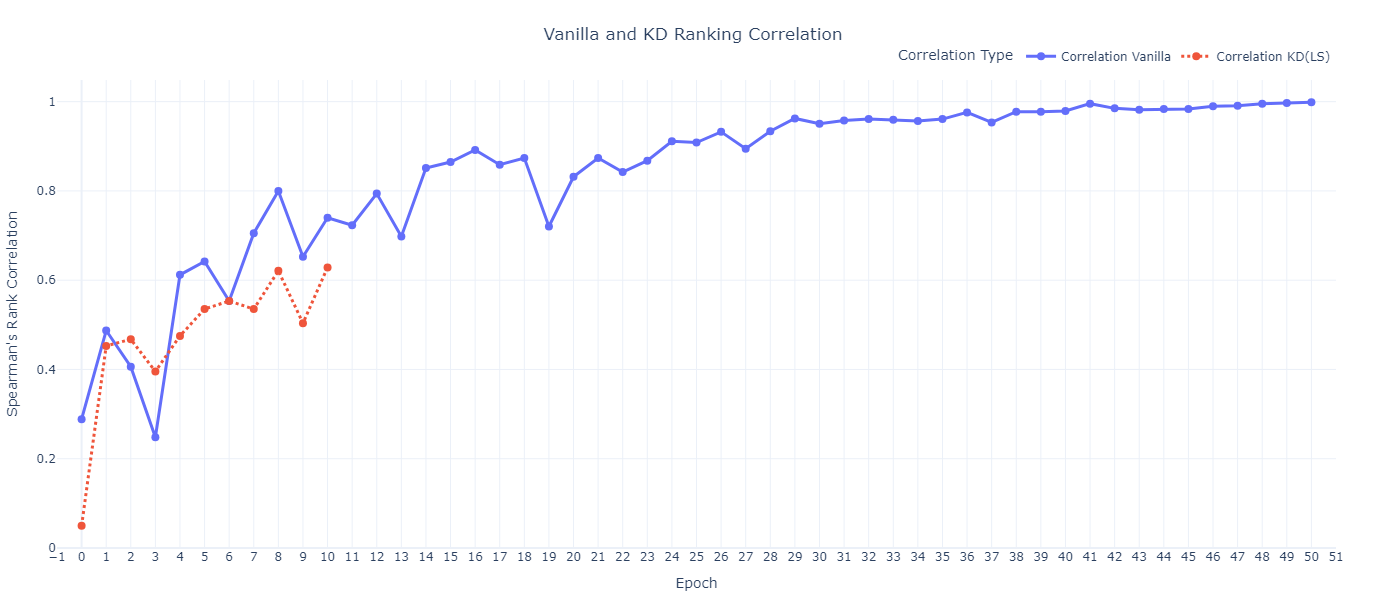

In [81]:
# Parameters
test_column = 'Correlation KD(LS)'
#n_epochs = 20

# Create dataframes
df = pd.DataFrame(list(corr_epochs["correlation_vanilla"].items()), columns=['Epoch', 'Correlation Vanilla'])
df_slope = pd.DataFrame(list(corr_epochs["correlation_kd"].items()), columns=['Epoch', test_column])

# Merge dataframes
df = pd.merge(df, df_slope, on="Epoch")

# Introduce NaNs for data after n_epochs+1
df.loc[n_epochs+1:, test_column] = np.nan

# Melt dataframe for Plotly
df_melted = df.melt(id_vars='Epoch', value_vars=['Correlation Vanilla', test_column], 
                    var_name='Type', value_name='Value')

# Create the plot
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Vanilla and KD Ranking Correlation for the First 20 Epochs with 120 Models',
              labels={"Value": "Spearman's Rank Correlation"},
              line_dash="Type",  # Different line styles for different types
              markers=True,  # Add markers to the lines
              template="plotly_white",  # A clean, professional template
              width=1000, height=600)

# Update trace settings
fig.update_traces(line=dict(width=3), marker=dict(size=8))

# Update layout settings
fig.update_layout(
    title={'text': 'Vanilla and KD Ranking Correlation', 'x':0.5, 'xanchor': 'center'},
    yaxis=dict(range=[0.0, df_melted['Value'].max()+0.05], showgrid=True),
    xaxis=dict(tickmode='linear', dtick=1, showgrid=True, range=[-1, 51]),
    legend=dict(title='Correlation Type', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, t=80, b=50)
)

# Display the plot
fig.show()

In [82]:
#fig.write_image(f"thesis_plots/Adaline_kd_correlation.png", format="png")
#fig.write_image(f"thesis_plots/Adaline_kd_correlation.svg", format="svg")

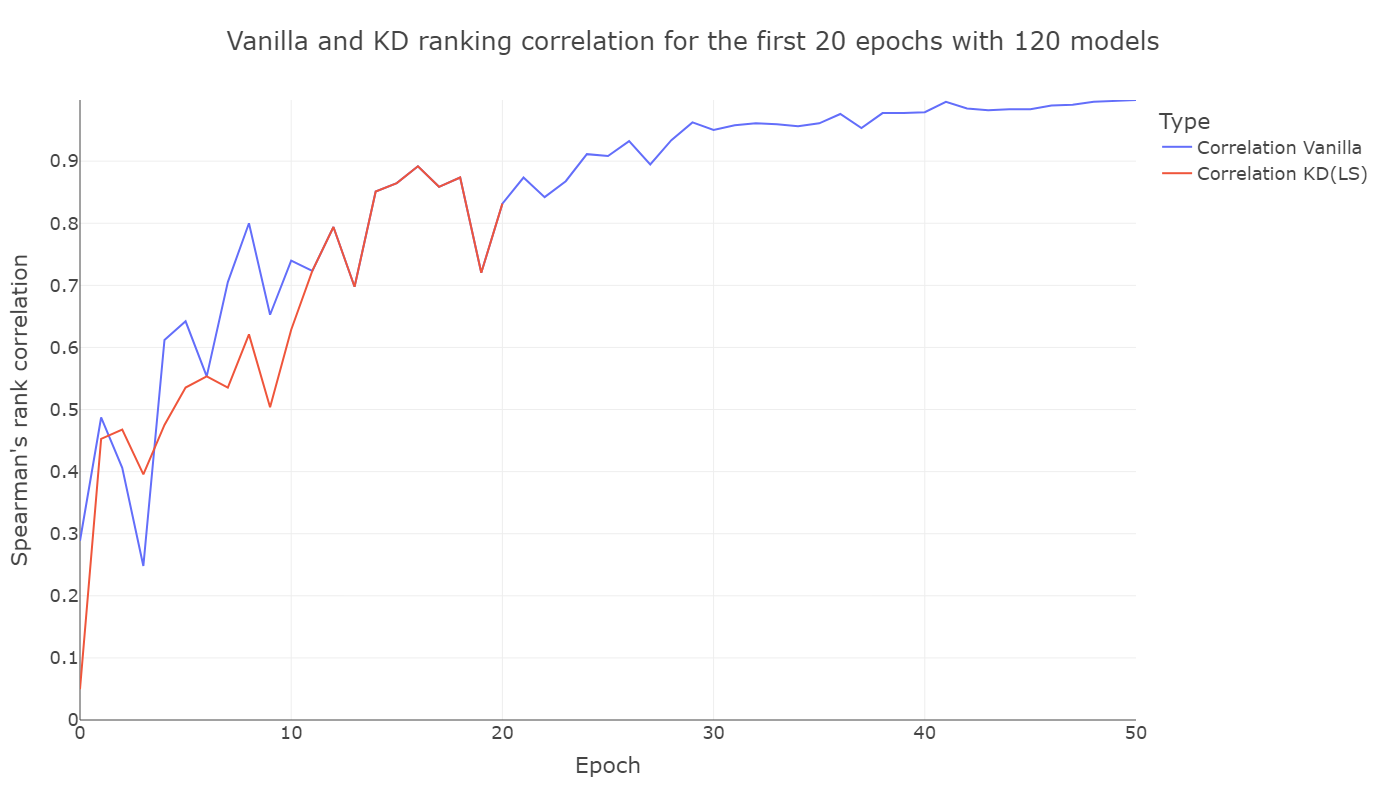

In [83]:
test_column= 'Correlation KD(LS)'
n_epochs=20
df = pd.DataFrame(list(corr_epochs["correlation_vanilla"].items()), columns=['Epoch', 'Correlation Vanilla'])
df_slope = pd.DataFrame(list(corr_epochs["correlation_kd"].items()), columns=['Epoch', test_column])

df=pd.merge(df, df_slope, on="Epoch")
df.loc[n_epochs+1:, test_column] = np.nan
# Create the line plot using Plotly
df_melted = df.melt(id_vars='Epoch', value_vars=['Correlation Vanilla', test_column], 
                    var_name='Type', value_name='Value')

# Plot the data
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Vanilla and KD ranking correlation for the first 20 epochs with 120 models')
fig.update_traces(line=dict(width=2)) 
fig.update_layout(width=1000, height=800, template="presentation",
                 yaxis_title="Spearman's rank correlation",
                 yaxis=dict(range=[0.0, df_melted['Value'].max()]))

fig

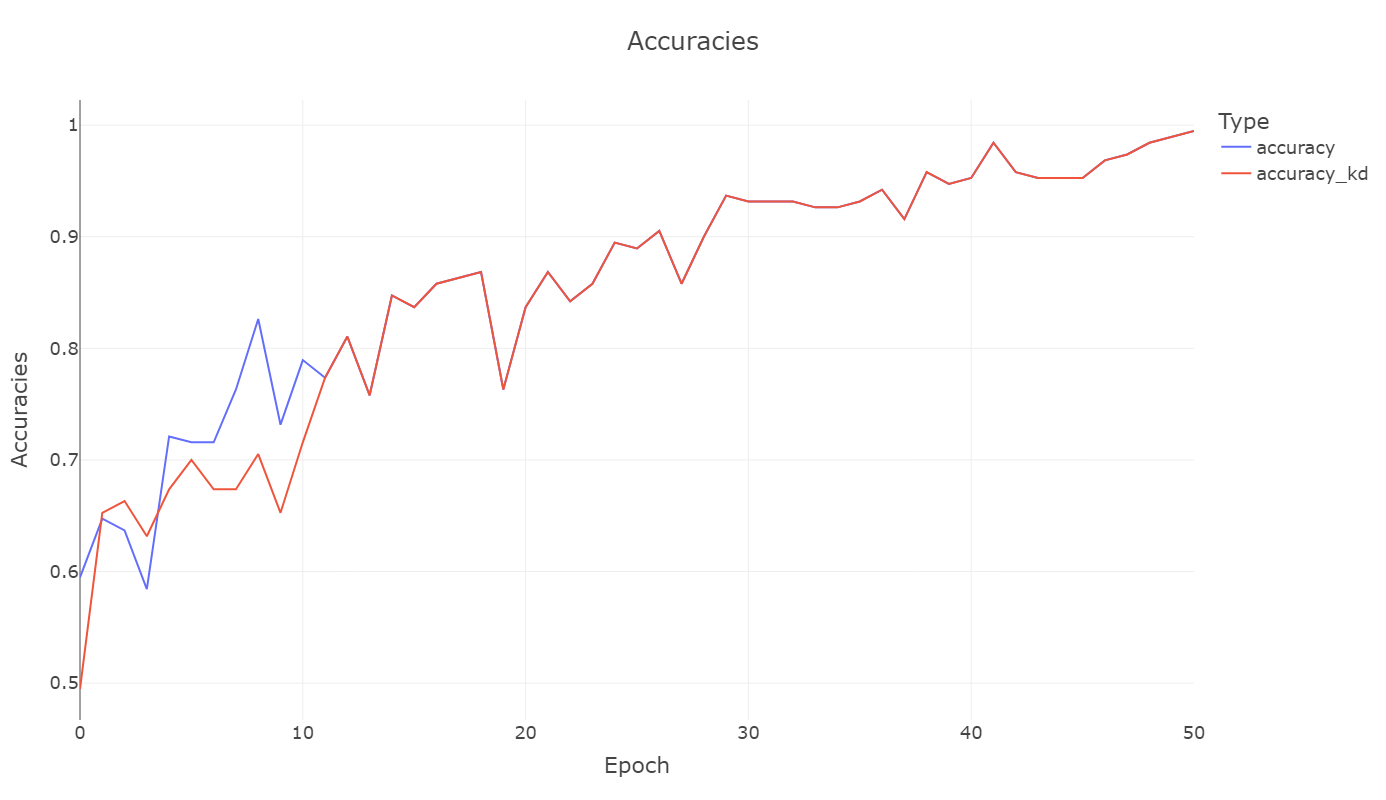

In [84]:
df = pd.DataFrame(list(corr_epochs["accuracy"].items()), columns=['Epoch', 'accuracy'])
df_slope = pd.DataFrame(list(corr_epochs["accuracy_kd"].items()), columns=['Epoch', 'accuracy_kd'])
df=pd.merge(df, df_slope, on="Epoch")
# Create the line plot using Plotly
df_melted = df.melt(id_vars='Epoch', value_vars=['accuracy', 'accuracy_kd'], 
                    var_name='Type', value_name='Value')

# Plot the data
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Accuracies')
fig.update_traces(line=dict(width=2)) 
fig.update_layout(width=1000, height=800, template="presentation",
                 yaxis_title="Accuracies")
fig

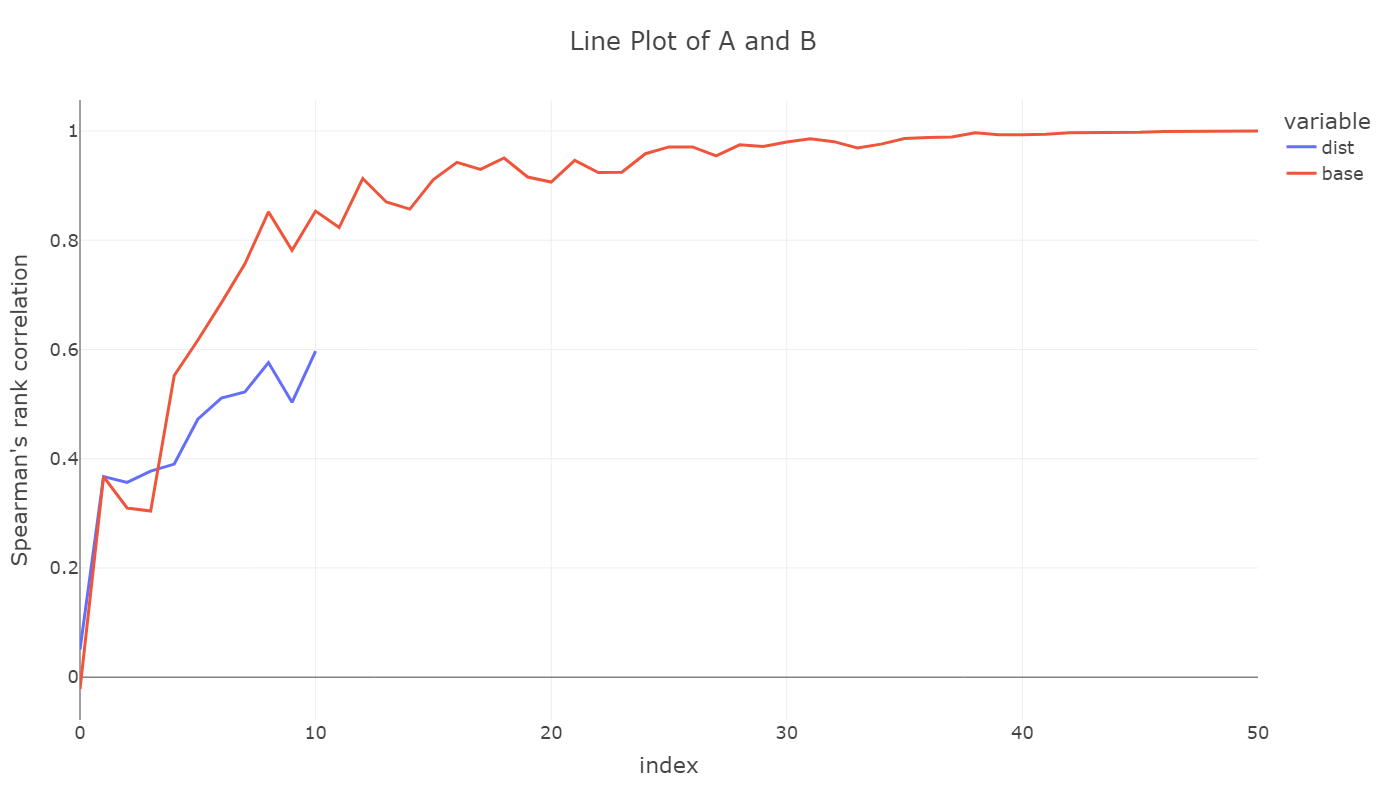

In [85]:
import plotly.express as px

# Create a line plot with two lines (one for each column)
fig = px.line(corr_df.reset_index(drop=True), y=['dist', 'base'], title="Line Plot of A and B")
fig.update_layout(width=800, height=800, template="presentation",
                 yaxis_title="Spearman's rank correlation")
# Show the plot
fig.show()